In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('../Resources/GSPC.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-2.455155,0.000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.322326,-2.455155
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000,-1.835227,0.322326
2008-01-09,1390.250000,1409.189941,1378.699951,1409.130005,1409.130005,5351030000,1.362408,-1.835227
2008-01-10,1406.780029,1429.089966,1395.310059,1420.329956,1420.329956,5170490000,0.794813,1.362408


In [4]:
# to_period("w") splits the series into weekly increments
df.index.to_period("w")

PeriodIndex(['2007-12-31/2008-01-06', '2008-01-07/2008-01-13',
             '2008-01-07/2008-01-13', '2008-01-07/2008-01-13',
             '2008-01-07/2008-01-13', '2008-01-07/2008-01-13',
             '2008-01-14/2008-01-20', '2008-01-14/2008-01-20',
             '2008-01-14/2008-01-20', '2008-01-14/2008-01-20',
             ...
             '2013-12-16/2013-12-22', '2013-12-16/2013-12-22',
             '2013-12-16/2013-12-22', '2013-12-16/2013-12-22',
             '2013-12-23/2013-12-29', '2013-12-23/2013-12-29',
             '2013-12-23/2013-12-29', '2013-12-23/2013-12-29',
             '2013-12-30/2014-01-05', '2013-12-30/2014-01-05'],
            dtype='period[W-SUN]', name='Date', length=1509, freq='W-SUN')

In [5]:
# construct a list of all unique weekly periods that are in the dataset:
weeks = df.index.to_period("w").unique()
weeks

PeriodIndex(['2007-12-31/2008-01-06', '2008-01-07/2008-01-13',
             '2008-01-14/2008-01-20', '2008-01-21/2008-01-27',
             '2008-01-28/2008-02-03', '2008-02-04/2008-02-10',
             '2008-02-11/2008-02-17', '2008-02-18/2008-02-24',
             '2008-02-25/2008-03-02', '2008-03-03/2008-03-09',
             ...
             '2013-10-28/2013-11-03', '2013-11-04/2013-11-10',
             '2013-11-11/2013-11-17', '2013-11-18/2013-11-24',
             '2013-11-25/2013-12-01', '2013-12-02/2013-12-08',
             '2013-12-09/2013-12-15', '2013-12-16/2013-12-22',
             '2013-12-23/2013-12-29', '2013-12-30/2014-01-05'],
            dtype='period[W-SUN]', name='Date', length=314, freq='W-SUN')

# Time Calculations

The following example shows the calculations for the first training period and the first testing period

In [6]:
# Training Window (26 weeks)
training_window = 26

In [7]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'2007-12-31'

In [8]:
# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period

'2008-07-06'

In [9]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('2008-07-07/2008-07-13', 'W-SUN')

In [10]:
# The first day of the test week
start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'2008-07-07'

In [11]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'2008-07-13'

In [12]:
# Training data with just one window
train = df[start_of_training_period:end_of_training_period]
train

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-2.455155,0.000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.322326,-2.455155
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000,-1.835227,0.322326
2008-01-09,1390.250000,1409.189941,1378.699951,1409.130005,1409.130005,5351030000,1.362408,-1.835227
2008-01-10,1406.780029,1429.089966,1395.310059,1420.329956,1420.329956,5170490000,0.794813,1.362408
...,...,...,...,...,...,...,...,...
2008-06-27,1283.599976,1289.449951,1272.000000,1278.380005,1278.380005,6208260000,-0.371743,-2.936523
2008-06-30,1278.060059,1290.310059,1274.859985,1280.000000,1280.000000,5032330000,0.126722,-0.371743
2008-07-01,1276.689941,1285.310059,1260.680054,1284.910034,1284.910034,5846290000,0.383596,0.126722


In [13]:
# Testing data with just one window
test = df[start_of_test_week:end_of_test_week]
test

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2008-07-07,1262.900024,1273.949951,1240.680054,1252.310059,1252.310059,5265420000,-0.838543,0.109392
2008-07-08,1251.839966,1274.170044,1242.839966,1273.699951,1273.699951,6034110000,1.708035,-0.838543
2008-07-09,1273.380005,1277.359985,1244.569946,1244.689941,1244.689941,5181000000,-2.277617,1.708035
2008-07-10,1245.250000,1257.650024,1236.760010,1253.390015,1253.390015,5840430000,0.698975,-2.277617
2008-07-11,1248.660034,1257.270020,1225.349976,1239.489990,1239.489990,6742200000,-1.108994,0.698975


# Putting it all together

In [14]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

287

In [15]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

,Out-of-Sample Predictions


In [16]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

,Actual Returns


In [17]:
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window+i+1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df[start_of_training_period:end_of_training_period]
    test = df[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [18]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2008-07-07,-0.838543,-0.128083
2008-07-08,1.708035,0.002863
2008-07-09,-2.277617,-0.348918
2008-07-10,0.698975,0.201655
2008-07-11,-1.108994,-0.209528


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

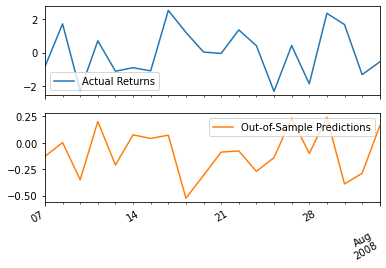

In [19]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

# RMSE for Out-of-sample Predictions

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Returns"],
    Results["Out-of-Sample Predictions"])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
r2 = r2_score(Results["Actual Returns"], Results["Out-of-Sample Predictions"])
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.5640825019116436
Out-of-Sample r2: -0.009549757848412499
